# Challenge: Preparing a dataset for modeling

1. Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

2. Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

3. Finally, use filtering methods to select the five best features and justify your choices.

<img src='logo.png'>

The data contains complete loan data for all loans issued through 2007-2015.

In [80]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

sns.set(style="whitegrid")
%matplotlib inline

In [4]:
#Bring In Data
data = pd.read_csv('loan.csv', low_memory=False)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Assumptions

1. Based on gut, Im assuming that the loan amount, interest rate, revolving balance, installment, annual income,sub grade, purpose and home ownership will be interesting features. Will use these as my basis for features

2. The sub grade, will already account for a lot of the features, so there is correlation.

How many variables?

In [8]:
len(data.columns)

74

How many datapoints?

In [9]:
#This shows how many datapoints, how many nulls and the datatypes for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Since there are several columns with a lot of missing data. Im going to establish a threshold, and then remove all columns that do not meet this threshold.

In [6]:
#Drop columns that dont meet the threshold
#Need to look at the process why the data was missing. 
data = data.dropna(axis=1, thresh=887370)

In [7]:
#Number of attributes/vvariables that are reduced because of the dropping
len(data.columns)

36

In [86]:
#Create basis called attributes
attributes = data[['sub_grade','grade','home_ownership', 'loan_amnt','purpose','installment','int_rate', 'revol_bal','annual_inc']]

#Need to impute value on annual income. 
attributes['annual_inc'].fillna(0, inplace=True)

/Users/brandyn/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [53]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 9 columns):
sub_grade         887379 non-null object
grade             887379 non-null object
home_ownership    887379 non-null object
loan_amnt         887379 non-null float64
purpose           887379 non-null object
installment       887379 non-null float64
int_rate          887379 non-null float64
revol_bal         887379 non-null float64
annual_inc        887379 non-null float64
dtypes: float64(5), object(4)
memory usage: 60.9+ MB


In [54]:
#Outcome variable will be Default, will include charge off as default
outcome = np.where((data['loan_status'].isin(['Default','Charged Off'])),1,0)

In [49]:
len(outcome)

887379

#### Univariate Analysis

In [26]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 7 columns):
sub_grade         887379 non-null object
home_ownership    887379 non-null object
loan_amnt         887379 non-null float64
installment       887379 non-null float64
int_rate          887379 non-null float64
revol_bal         887379 non-null float64
annual_inc        887375 non-null float64
dtypes: float64(5), object(2)
memory usage: 47.4+ MB


Continuous Variables:
1. loan_amount
2. installment
3. int_rate
4. revol_bal
5. annual_inc

Categorical Variables:
1. home_ownership
2. sub_grade
3. Purpose
4. Grade



### Bivariate Analysis

Continuous Variables

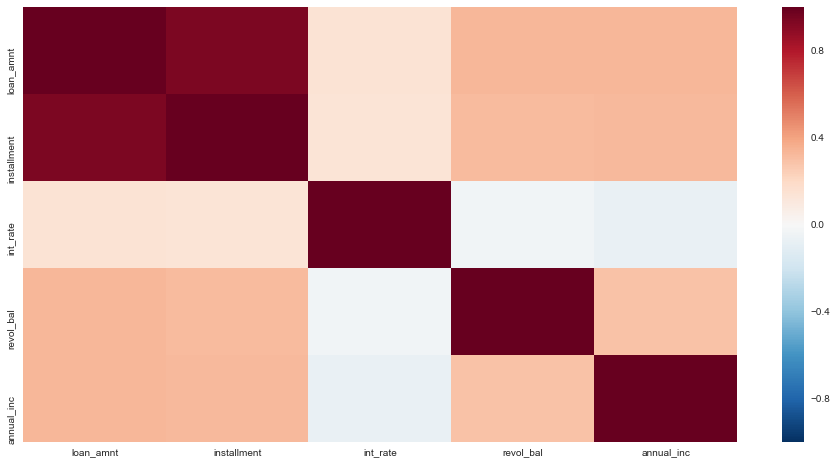

In [32]:
#Make a correlation matrix
plt.figure(figsize=(16,8))
datacorr = attributes.corr()
sns.heatmap(datacorr)

Note that the installment and loan amount is very correlated.

Continuous and Categorical Pair

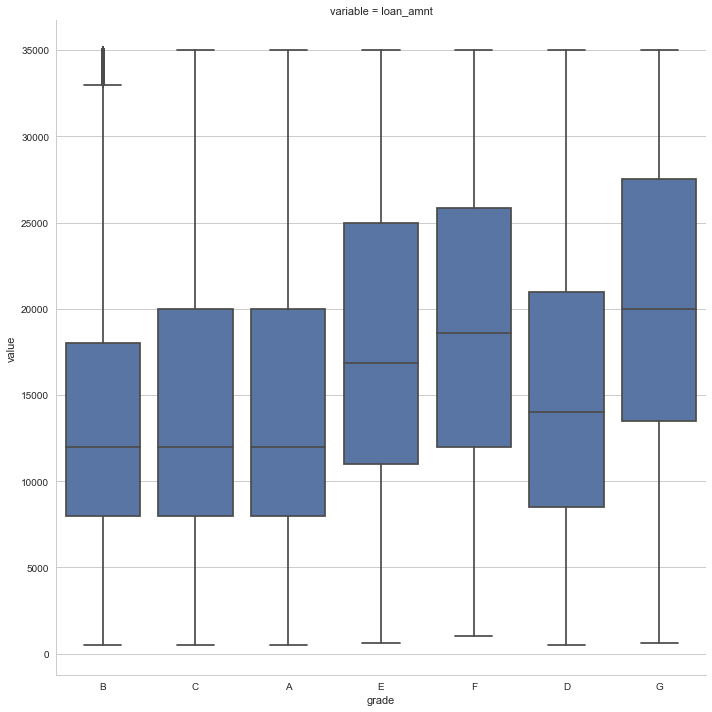

In [59]:
#Loan Amount by Grade
df_purpose = attributes[['grade','loan_amnt']]
df_purpose = pd.melt(df_purpose, id_vars=['grade'])

plt.figure(figsize=(16,30))
g = sns.FacetGrid(df_purpose, row="variable", size=10)
g = g.map(sns.boxplot, "grade", "value")
plt.show()

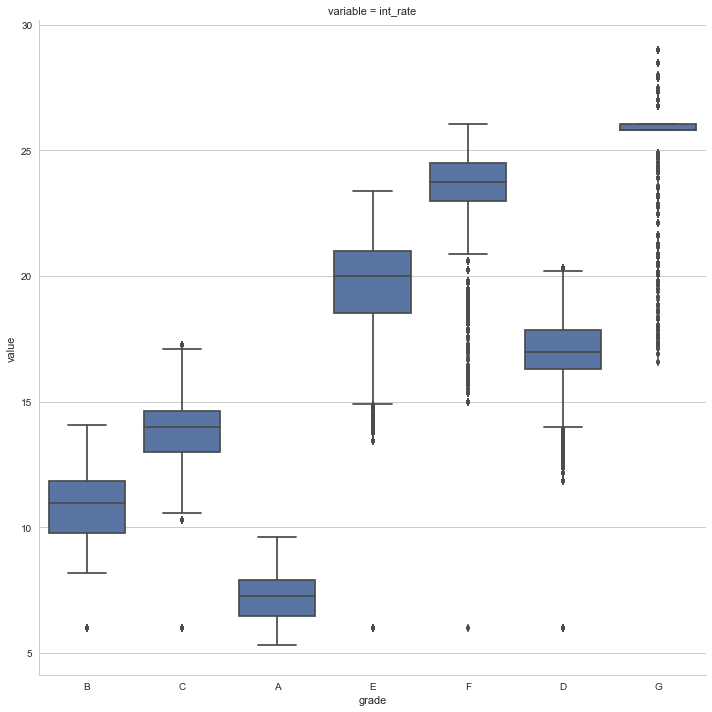

In [60]:
#Interest rate by Grade
df_grade = attributes[['grade','int_rate']]
df_grade = pd.melt(df_grade, id_vars=['grade'])

plt.figure(figsize=(16,40))
g = sns.FacetGrid(df_grade, row="variable", size=10)
g = g.map(sns.boxplot, "grade", "value")
plt.show()

Descriptive Statistics

In [55]:
attributes.groupby('grade').describe().transpose()

grade                         A             B             C             D  \
annual_inc  count  1.481980e+05  2.545350e+05  2.458600e+05  1.395420e+05   
            mean   8.694265e+04  7.548739e+04  7.153695e+04  6.916927e+04   
            std    8.232881e+04  6.531624e+04  5.846073e+04  5.484524e+04   
            min    3.300000e+03  2.000000e+03  0.000000e+00  0.000000e+00   
            25%    5.300000e+04  4.600000e+04  4.400000e+04  4.200000e+04   
            50%    7.500000e+04  6.500000e+04  6.000000e+04  6.000000e+04   
            75%    1.029704e+05  9.000000e+04  8.500000e+04  8.300000e+04   
            max    9.500000e+06  8.700000e+06  8.706582e+06  8.900060e+06   
installment count  1.482020e+05  2.545350e+05  2.458600e+05  1.395420e+05   
            mean   4.275992e+02  4.084393e+02  4.219421e+02  4.555702e+02   
            std    2.302605e+02  2.261141e+02  2.432658e+02  2.595599e+02   
            min    1.567000e+01  1.591000e+01  1.647000e+01  1.673000e+01   
            25%    2.479700e+02  2.460400e+02  2.517500e+02  2.734300e+02   
            50%    3.754300e+02  3.570500e+02  3.615200e+02  3.941300e+02   
            75%    5.988200e+02  5.237500e+02  5.418100e+02  5.963400e+02   
            max    1.111370e+03  1.197750e+03  1.252560e+03  1.306270e+03   
int_rate    count  1.482020e+05  2.545350e+05  2.458600e+05  1.395420e+05   
            mean   7.243312e+00  1.082962e+01  1.398010e+01  1.717581e+01   
            std    9.754547e-01  1.443258e+00  1.228535e+00  1.242879e+00   
            min    5.320000e+00  6.000000e+00  6.000000e+00  6.000000e+00   
            25%    6.490000e+00  9.760000e+00  1.299000e+01  1.629000e+01   
            50%    7.260000e+00  1.099000e+01  1.399000e+01  1.699000e+01   
            75%    7.890000e+00  1.183000e+01  1.465000e+01  1.786000e+01   
            max    9.630000e+00  1.409000e+01  1.727000e+01  2.031000e+01   
loan_amnt   count  1.482020e+05  2.545350e+05  2.458600e+05  1.395420e+05   
            mean   1.403886e+04  1.364297e+04  1.446631e+04  1.545951e+04   
            std    7.502131e+03  7.761052e+03  8.538699e+03  9.012631e+03   
            min    5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
            25%    8.000000e+03  8.000000e+03  8.000000e+03  8.500000e+03   
            50%    1.200000e+04  1.200000e+04  1.200000e+04  1.400000e+04   
            75%    2.000000e+04  1.800000e+04  2.000000e+04  2.100000e+04   
            max    3.500000e+04  3.500000e+04  3.500000e+04  3.500000e+04   
revol_bal   count  1.482020e+05  2.545350e+05  2.458600e+05  1.395420e+05   
            mean   1.895396e+04  1.691140e+04  1.635523e+04  1.588087e+04   
            std    2.736265e+04  2.127230e+04  2.115577e+04  2.159741e+04   
            min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
            25%    6.918000e+03  6.676000e+03  6.279000e+03  5.945000e+03   
            50%    1.286600e+04  1.187900e+04  1.156300e+04  1.130400e+04   
            75%    2.258100e+04  2.062300e+04  2.028700e+04  2.002475e+04   
            max    2.568995e+06  1.743266e+06  1.746716e+06  2.904836e+06   

grade                         E             F              G  
annual_inc  count  7.070500e+04  2.304600e+04    5489.000000  
            mean   7.211915e+04  7.380117e+04   79904.591762  
            std    6.074616e+04  4.862122e+04   58880.889338  
            min    1.200000e+03  4.524000e+03    1896.000000  
            25%    4.500000e+04  4.600000e+04   49548.000000  
            50%    6.100000e+04  6.500000e+04   68000.000000  
            75%    8.500000e+04  8.800000e+04   94000.000000  
            max    7.500000e+06  1.500000e+06  980000.000000  
installment count  7.070500e+04  2.304600e+04    5489.000000  
            mean   5.149936e+02  5.656543e+02     627.054815  
            std    2.595722e+02  2.636955e+02     266.317485  
            min    2.053000e+01  2.782000e+01      21.590000  
            25%    3.18

### 2. Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Want to test if the continuous variables are normally distributed.

In [23]:
#Create Normal Test Function
from scipy import stats

def normal_test(data):
    k2, p = stats.normaltest(data)
    alpha = 1e-3
    print("p = {:g}".format(p))

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

Loan Amount

In [29]:
#Normality Test on Raw
print('Raw:')
normal_test(attributes['loan_amnt'].dropna())

#Log
print('Log:')
normal_test(np.log(attributes['loan_amnt'].dropna()))

#Square Root
print('Square Root:')
normal_test(np.sqrt(attributes['loan_amnt'].dropna()))

#Inverse
print('Inverse:')
normal_test(1/attributes['loan_amnt'].dropna())


Raw:
p = 0
The null hypothesis can be rejected
Log:
p = 0
The null hypothesis can be rejected
Square Root:
p = 0
The null hypothesis can be rejected
Inverse:
p = 0
The null hypothesis can be rejected


Note that none of the transformations made the distribution normal. This is something to look out for.

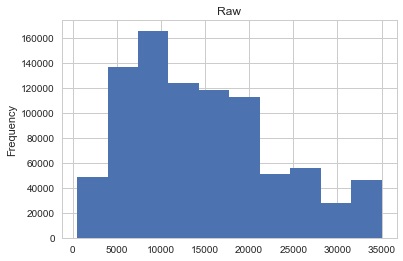

In [30]:
#Loan Amount
plt.figure()
attributes['loan_amnt'].plot(kind='hist')
plt.title('Raw')


Interest Rate

In [31]:
#Normality Test on Raw
print('Raw:')
normal_test(attributes['int_rate'].dropna())

#Log
print('Log:')
normal_test(np.log(attributes['int_rate'].dropna()))

#Square Root
print('Square Root:')
normal_test(np.sqrt(attributes['int_rate'].dropna()))

#Inverse
print('Inverse:')
normal_test(1/attributes['int_rate'].dropna())

Raw:
p = 0
The null hypothesis can be rejected
Log:
p = 0
The null hypothesis can be rejected
Square Root:
p = 0
The null hypothesis can be rejected
Inverse:
p = 0
The null hypothesis can be rejected


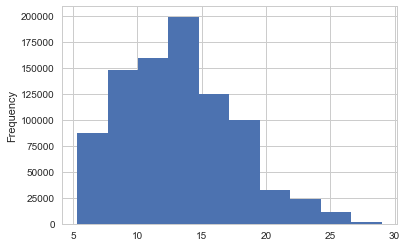

In [32]:
plt.figure()
attributes['int_rate'].plot(kind='hist')

Annual Income

In [33]:
#Normality Test on Raw
print('Raw:')
normal_test(attributes['annual_inc'].dropna())

#Log
print('Log:')
normal_test(np.log(attributes['annual_inc'].dropna()))

#Square Root
print('Square Root:')
normal_test(np.sqrt(attributes['annual_inc'].dropna()))

#Inverse
print('Inverse:')
normal_test(1/attributes['annual_inc'].dropna())

Raw:
p = 0
The null hypothesis can be rejected
Log:
p = nan
The null hypothesis cannot be rejected
Square Root:
p = 0
The null hypothesis can be rejected
Inverse:
p = nan
The null hypothesis cannot be rejected


/Users/brandyn/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/brandyn/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:926: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


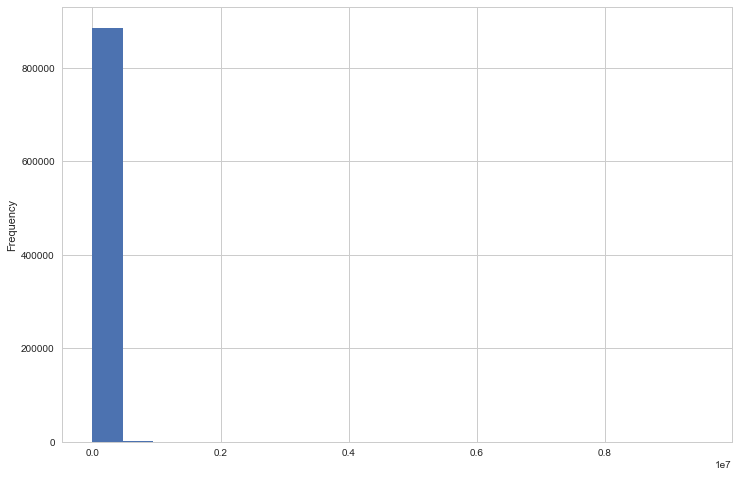

In [57]:
#This plot means there are outliers in the annual income. Lets explore this further with a box plot
plt.figure(figsize=(12,8))
attributes['annual_inc'].plot(kind='hist', bins=20)

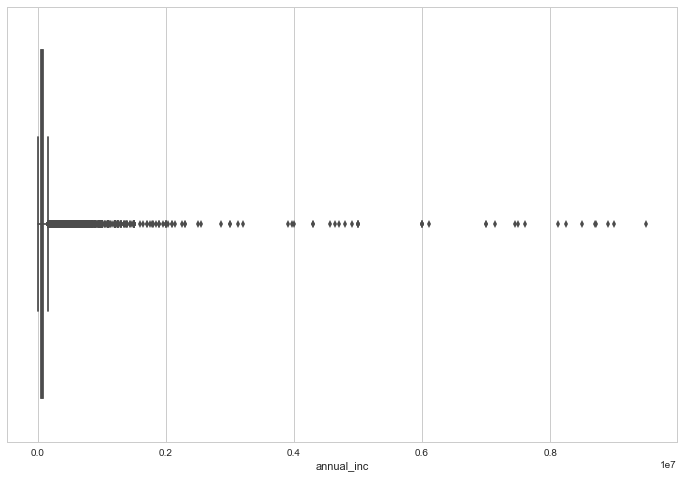

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(data['annual_inc'])

The box plot and histogram shows that there are a lot of outliers in the annual income. As well as some incomes of 0.

Since any transformation I tried does not turn any of the continuous variables normal, will include them in the feature set and will focus on the categorical features. Will expand the categorical features to be new features. Specifically will expand home ownership, purpose and Sub grade into new features.

In [87]:
#Since using the sub grade, will drop grade before creating new features
#Will also drop installment since its very correlated to another column
attributes = attributes.drop(['grade', 'installment'], axis=1)
features = pd.get_dummies(attributes)
features.dropna(inplace=True)

In [56]:
features.head()

,loan_amnt,installment,int_rate,revol_bal,annual_inc,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,10.65,13648.0,24000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,15.27,1687.0,30000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,15.96,2956.0,12252.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,13.49,5598.0,49200.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,67.79,12.69,27783.0,80000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 3. Finally, use filtering methods to select the five best features and justify your choices.

To select the Best features Im using the Sklearn module Feature selection. Since my outcome is a categorical variable, I will use classification techniques Chi squared and f_classif.

#### Chi Squared

The chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [89]:
#For filter Methods since the output is categorical (1 or 0) 
#Using sklearn Univariate feature selection

#This way works, but dont get column labels. Trying to get column labels
X_chi = SelectKBest(chi2, k=5).fit_transform(features, outcome)
best_chi_features = pd.DataFrame(X_chi)
best_chi_features.head()

,0,1,2,3,4
0,5000.0,10.65,13648.0,24000.0,0.0
1,2500.0,15.27,1687.0,30000.0,0.0
2,2400.0,15.96,2956.0,12252.0,1.0
3,10000.0,13.49,5598.0,49200.0,0.0
4,3000.0,12.69,27783.0,80000.0,0.0


In [88]:
#Retreive Column Names
selector = SelectKBest(chi2, k=5)
selector.fit(features,outcome)

idxs_selected = selector.get_support(indices=True)
features[features.columns[idxs_selected]].head()

,loan_amnt,int_rate,revol_bal,annual_inc,purpose_small_business
0,5000.0,10.65,13648.0,24000.0,0
1,2500.0,15.27,1687.0,30000.0,0
2,2400.0,15.96,2956.0,12252.0,1
3,10000.0,13.49,5598.0,49200.0,0
4,3000.0,12.69,27783.0,80000.0,0


#### F_classif

Compute the ANOVA F-value for the provided sample.

In [90]:
selector = SelectKBest(f_classif, k=5)
selector.fit(features,outcome)

idxs_selected = selector.get_support(indices=True)
features[features.columns[idxs_selected]].head()

,int_rate,annual_inc,home_ownership_RENT,purpose_credit_card,purpose_small_business
0,10.65,24000.0,1,1,0
1,15.27,30000.0,1,0,0
2,15.96,12252.0,1,0,1
3,13.49,49200.0,1,0,0
4,12.69,80000.0,1,0,0
